<a href="https://colab.research.google.com/github/Mrcodehunter/Competitive-programming/blob/master/assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename=input("Enter file name: ");

Enter file name: drive/My Drive/Colab Notebooks/A4Part1TestData.txt


In [4]:
file=open(filename)
lines=file.readlines()
l=len(lines)

In [5]:
array=[]
for line in lines:
  x=line.split(",")
  y=x[1].split("\n")
  y=float(y[0])
  x=float(x[0])
  array.append([x,y])

In [6]:
xsum=0
ysum=0
xvalues=[]
yvalues=[]
for x in array:
  xsum=xsum+x[0]
  ysum=ysum+x[1]
  xvalues.append(x[0])
  yvalues.append(x[1])
xav=xsum/l
yav=ysum/l

In [20]:
#creating line
num=0
den=0
for x in array:
  num=num+(x[0]-xav)*(x[1]-yav)
  den=den+(x[0]-xav)*(x[0]-xav)

slope=num/den
ycut=yav-slope*xav

equation="Y = "+str(slope)+"X "
if ycut > 0.0 :
  equation=equation+"+ "
else :
  equation=equation+"- "
equation=equation+str(abs(ycut))
print(equation)

Y = 1.1870380147835267X + 3.40740056318198


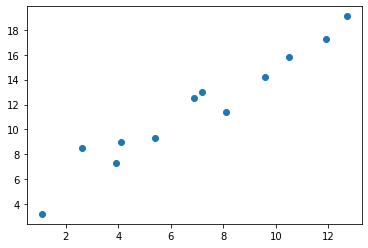

In [9]:
plt.scatter(xvalues,yvalues)

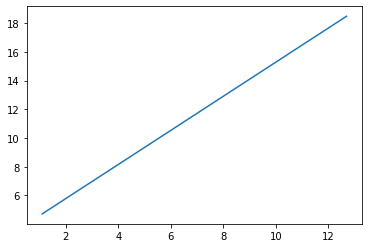

In [10]:
x1=100000000.00
x2=-100000000.00
for x in xvalues:
  x1=min(x1,x)
  x2=max(x2,x)
y1=slope*x1+ycut
y2=slope*x2+ycut
plt.plot([x1,x2],[y1,y2])

In [11]:
# 2nd PArt
COST_PER_KM = 1400000
FUNDING_AVAILABLE = 40000000

In [12]:
class Street:
  def __init__(self, name, length,carperday,condition):
    self.name = name
    self.length = length
    self.carperday= carperday
    self.condition= condition
  def printobject(self):
    print("*************")
    print(self.name)
    print(self.length)
    print(self.carperday)
    print(self.condition)
    print("**************")
  def compare(self,obj):
    if self.condition == obj.condition:
      return (self.carperday >= obj.carperday)
    else :
      if self.condition == "poor":
        return True
      if obj.condition == "poor":
        return False
      return (self.condition == "fair")
  def getCost(self):
    return (COST_PER_KM*self.length)

In [13]:
def sortlist(lst):
  ln = len(lst)
  for i in range(ln):
    for j in range(i+1,ln):
      if lst[j].compare(lst[i]):
        a=lst[i]
        lst[i]=lst[j]
        lst[j]=a
  return lst

In [14]:
filename=input("Please enter the name of the road file > ")
file=open(filename)

Please enter the name of the road file > drive/My Drive/Colab Notebooks/A4Part2RoadData.txt


In [15]:
lst=[]
lines=file.readlines()
for line in lines:
  x=line.split(",")
  con=x[3].split("\n")
  obj=Street(str(x[0]),float(x[1]),float(x[2]),str(con[0]))
  lst.append(obj)

In [16]:
lst=sortlist(lst)

In [17]:
print("The streets, in decreasing order of priority, are:")
print("--------------------------------------------------")
#Magpie is 2.60 km long, sees 4900 cars per day, and is in poor condition.
for x in lst:
  print(str(x.name)+" is "+str(x.length)+" km long, sees "+str(x.carperday)+" cars per day, ans is in "+str(x.condition)+" condition.")

The streets, in decreasing order of priority, are:
--------------------------------------------------
Magpie is 2.6 km long, sees 4900.0 cars per day, ans is in poor condition.
Elm is 4.1 km long, sees 3000.0 cars per day, ans is in poor condition.
Ash is 7.2 km long, sees 1400.0 cars per day, ans is in poor condition.
Cottonwood is 3.9 km long, sees 5800.0 cars per day, ans is in fair condition.
Raven is 8.8 km long, sees 4600.0 cars per day, ans is in fair condition.
Willow is 8.2 km long, sees 3600.0 cars per day, ans is in fair condition.
Robin is 9.0 km long, sees 2800.0 cars per day, ans is in fair condition.
Sparrow is 3.7 km long, sees 1800.0 cars per day, ans is in fair condition.
Pine is 1.2 km long, sees 300.0 cars per day, ans is in fair condition.
Oak is 5.6 km long, sees 200.0 cars per day, ans is in fair condition.
Owl is 5.5 km long, sees 4700.0 cars per day, ans is in good condition.
Maple is 6.5 km long, sees 2100.0 cars per day, ans is in good condition.
Spruce is 0.

In [18]:
print("The streets that will be repaired are:")
print("--------------------------------------")
#Magpie will be fixed at a cost of $3640000
for x in lst:
  if x.getCost() <= FUNDING_AVAILABLE:
    print(str(x.name)+" will be fixed at a cost of $"+str(x.getCost()))
    FUNDING_AVAILABLE=FUNDING_AVAILABLE-x.getCost()

The streets that will be repaired are:
--------------------------------------
Magpie will be fixed at a cost of $3640000.0
Elm will be fixed at a cost of $5739999.999999999
Ash will be fixed at a cost of $10080000.0
Cottonwood will be fixed at a cost of $5460000.0
Raven will be fixed at a cost of $12320000.000000002
Pine will be fixed at a cost of $1680000.0
Spruce will be fixed at a cost of $840000.0


In [19]:
print("The amount left over is $"+str(FUNDING_AVAILABLE))

The amount left over is $239999.99999999814
